<h1 align=center style="line-height:200%;font-family:verdana;color:#0099cc">
Word Frequency Analysis of User Reviews in Three Sentiment Categories
</h1>

### Introduction and Problem Statement

In this project, the goal is to perform **content-based analysis** of user reviews by classifying them into three sentiment categories — **positive**, **neutral**, and **negative**.

The workflow includes:
- Labeling reviews based on their overall rating.
- Cleaning and preprocessing the text data.
- Creating **Word Clouds** for each sentiment to visualize frequently used words.
- Identifying **common words** shared across different sentiment groups to analyze linguistic similarities.

Finally, we interpret the results and extract insights about how users express satisfaction, dissatisfaction, or neutrality regarding products.


In [1]:
# Mount Google Drive to access dataset files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Required Libraries

We import the necessary Python libraries for:
- **Data analysis** (pandas, numpy)
- **Text preprocessing** (nltk, string)
- **Visualization** (matplotlib, seaborn, wordcloud)

In [2]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
import random
from collections import Counter

### Read the Dataset

We load the main dataset containing user reviews.  
The analysis focuses mainly on the `reviewText` column which holds the actual user comments.

Any missing values in this column will be ignored.

In [3]:
# Load dataset from Google Drive
train_data = pd.read_csv('/content/drive/MyDrive/project2/train_data.csv')

/tmp/ipython-input-1321685534.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('/content/drive/MyDrive/project2/train_data.csv')


In [4]:
# Display dataset information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         838944 non-null  int64 
 1   vote            191468 non-null  object
 2   verified        838944 non-null  bool  
 3   reviewTime      838944 non-null  object
 4   reviewerID      838944 non-null  object
 5   asin            838944 non-null  object
 6   style           490613 non-null  object
 7   reviewerName    838717 non-null  object
 8   reviewText      838944 non-null  object
 9   summary         838868 non-null  object
 10  unixReviewTime  838944 non-null  int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 64.8+ MB


In [5]:
# check for missing values
# train_data.isna().sum()

### Text Preprocessing and Cleaning

We prepare the data for analysis by:
1. Downloading English stopwords (e.g., *the, is, and*).
2. Creating a sentiment labeling function based on the `overall` rating:
   - Ratings **4–5 → Positive**
   - Rating **3 → Neutral**
   - Ratings **1–2 → Negative**
3. Defining a text cleaning function that:
   - Converts text to lowercase
   - Removes punctuation
   - Removes stopwords
   - Removes short words (less than 3 letters)

In [6]:
# Download English stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
# Function to label sentiments based on overall rating
def label_sentiment(x):
    if x in [4,5]:
        return 'positive'
    elif x == 3:
        return 'neutral'
    else:
        return 'negative'

In [8]:
# Add a new column 'sentiment' to store the label
train_data['sentiment'] = train_data['overall'].apply(label_sentiment)

In [9]:
# Function to clean and normalize text
def clean_text(text):
    if pd.isna(text):
        return ''
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([c for c in text if c not in string.punctuation])
    # Tokenize words and remove stopwords/short words
    words = text.split()
    words = [w for w in words if w not in stop_words and len(w)>2]
    return ' '.join(words)

In [10]:
# Apply cleaning function to the review text column
train_data['clean_text'] = train_data['reviewText'].apply(clean_text)

In [11]:
# def sample_texts(df, sentiment, n=3000):
#     texts = df.loc[df['sentiment']==sentiment, 'clean_text'].dropna().tolist()
#     random.shuffle(texts)
#     return ' '.join(texts[:n])

In [12]:
# pos_text = sample_texts(train_data, 'positive')
# neu_text = sample_texts(train_data, 'neutral')
# neg_text = sample_texts(train_data, 'negative')

### Combine Reviews by Sentiment

We merge all cleaned texts from each sentiment group into a single string.  
This allows us to generate **Word Clouds** and calculate word frequencies per sentiment.

In [13]:
# Combine cleaned reviews by sentiment category
pos_text = ' '.join(train_data[train_data['sentiment'] == 'positive']['clean_text'].tolist())
neu_text = ' '.join(train_data[train_data['sentiment'] == 'neutral']['clean_text'].tolist())
neg_text = ' '.join(train_data[train_data['sentiment'] == 'negative']['clean_text'].tolist())

In [14]:
# Quick checks
print("Positive text length:", len(pos_text))
print("Negative text sample:", neg_text[:200])

Positive text length: 238848772
Negative text sample: older urcwr7 remote thought would upgrade twc stuck one fails one didnt old remote could head head learn different blu ray players panasonic one fails cannot learn buttons biggest problem streaming ne


### Analyze Top Frequent Words

We calculate the top 20 most common words in each sentiment category using Python’s `Counter` object.  
Then, we display the results in a combined table for **Positive**, **Neutral**, and **Negative** reviews.


In [15]:
# Define number of top words to extract
top_n = 20

# Count word frequencies per sentiment
top_pos = Counter(pos_text.split()).most_common(top_n)
top_neu = Counter(neu_text.split()).most_common(top_n)
top_neg = Counter(neg_text.split()).most_common(top_n)

# Convert to DataFrames
df_pos = pd.DataFrame(top_pos, columns=['Word', 'Count'])
df_neu = pd.DataFrame(top_neu, columns=['Word', 'Count'])
df_neg = pd.DataFrame(top_neg, columns=['Word', 'Count'])

# Rename columns with sentiment labels for clarity
df_pos.columns = pd.MultiIndex.from_product([['Positive Class'], ['Word', 'Count']])
df_neu.columns = pd.MultiIndex.from_product([['Neutral Class'], ['Word', 'Count']])
df_neg.columns = pd.MultiIndex.from_product([['Negative Class'], ['Word', 'Count']])

In [16]:
# Combine all into one table
pd.concat([df_pos, df_neu, df_neg], axis=1)

Positive Class         Neutral Class        Negative Class       
             Word   Count          Word  Count           Word  Count
0             one  299842           one  40615            one  72053
1           great  285107         would  35550          would  58012
2             use  261978           use  35351           work  50787
3            like  223003          good  32314            get  50494
4            good  218571          like  32197            use  46194
5            well  204804           get  30307           like  40323
6           would  192536          work  25866           time  38618
7             get  171117          well  22872           even  36637
8           works  156925         sound  21405        product  36558
9           sound  145866         great  21230           back  34272
10           case  145339          dont  20965           good  34082
11        quality  143373          time  19930           dont  32313
12           also  143344       quality  19374         camera  27897
13         really  136399         works  18911         bought  27508
14          cable  128007          case  18872        quality  25907
15          price  127009          also  18827          sound  25500
16           dont  125544        really  18757           well  25448
17           time  124709        camera  18032           also  24778
18           work  124113        better  17773          first  23811
19          using  121705          much  17042          great  23481

### Common Words Across Sentiments

We extract overlapping words between sentiment categories to identify shared vocabulary.  
This helps reveal linguistic similarities between positive, neutral, and negative feedback.


In [17]:
# Convert lists of words to sets for intersection
pos_set = set([w for w, c in top_pos])
neu_set = set([w for w, c in top_neu])
neg_set = set([w for w, c in top_neg])

# Compute intersections
common_pos_neu = pos_set & neu_set
common_pos_neg = pos_set & neg_set
common_neu_neg = neu_set & neg_set
common_all = pos_set & neu_set & neg_set

# Print overlapping words
print('Common words between Positive & Neutral:', common_pos_neu)
print('Common words between Positive & Negative:', common_pos_neg)
print('Common words between Neutral & Negative:', common_neu_neg)
print('Common words across all three categories:', common_all)

Common words between Positive & Neutral: {'dont', 'works', 'get', 'time', 'use', 'great', 'sound', 'work', 'really', 'also', 'good', 'would', 'one', 'well', 'quality', 'like', 'case'}
Common words between Positive & Negative: {'dont', 'get', 'time', 'use', 'great', 'sound', 'work', 'good', 'also', 'would', 'one', 'well', 'quality', 'like'}
Common words between Neutral & Negative: {'dont', 'get', 'time', 'use', 'great', 'camera', 'sound', 'work', 'good', 'also', 'would', 'one', 'well', 'quality', 'like'}
Common words across all three categories: {'dont', 'time', 'get', 'use', 'great', 'sound', 'work', 'good', 'also', 'would', 'one', 'well', 'quality', 'like'}


### Barplot Comparison of Top Words

We create a comparative bar chart to visualize the top 10 most frequent words  
in each sentiment category (Positive, Neutral, Negative).


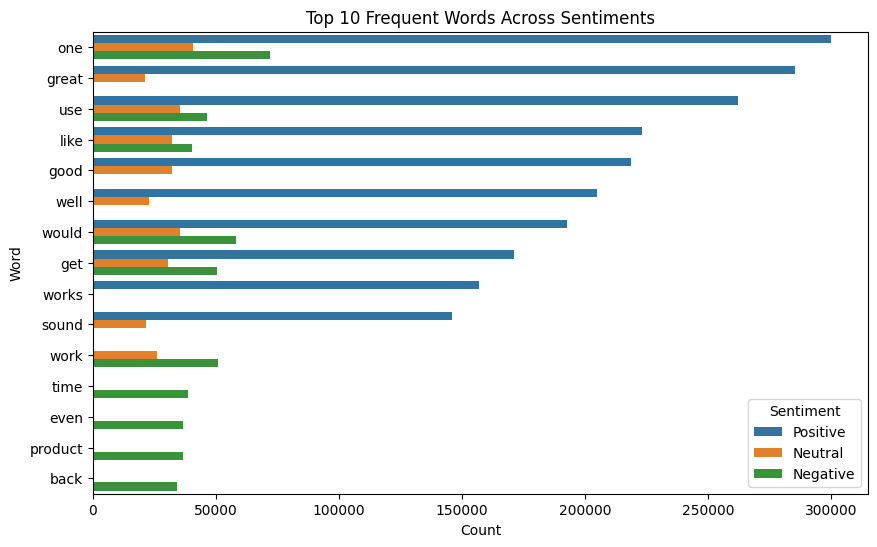

In [18]:
import seaborn as sns

# Prepare data for plotting
df_compare = pd.concat([
    df_pos['Positive Class'].head(10).assign(Sentiment='Positive'),
    df_neu['Neutral Class'].head(10).assign(Sentiment='Neutral'),
    df_neg['Negative Class'].head(10).assign(Sentiment='Negative')
])

# Create barplot
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Word', hue='Sentiment', data=df_compare)
plt.title('Top 10 Frequent Words Across Sentiments')
plt.show()

### Interpretation

The top 20 most frequent words show significant overlap across sentiment groups.  
Common terms such as *one*, *use*, *work*, *good*, *time*, *sound*, and *quality* appear frequently in all categories.

This suggests that users discuss similar aspects of the product — such as performance, usability, and build quality —  
regardless of sentiment.  

However, context plays a key role:  
- In positive reviews, “**works**” may appear in phrases like *“works perfectly”* or *“works great”*.  
- In negative reviews, it might appear in *“doesn’t work”* or *“stopped working”*.

Thus, word frequency alone cannot capture true emotional polarity;  
sentence-level context is required for deeper understanding.


### Word Cloud Visualization

We generate separate Word Clouds for **Positive**, **Neutral**, and **Negative** reviews  
to visualize the distribution and prominence of words in each sentiment.


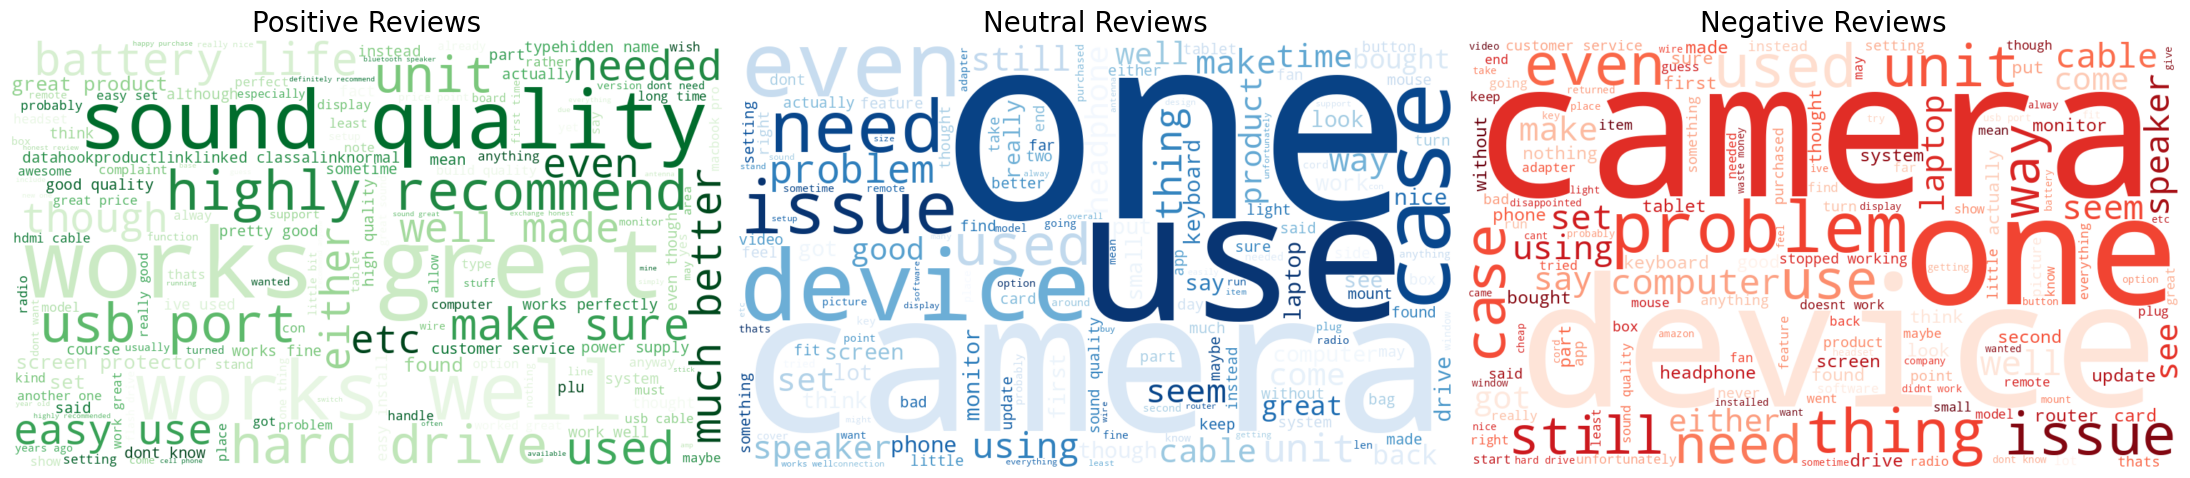

In [19]:
# Create a 3-column figure for the three sentiment categories
fig, axs = plt.subplots(1, 3, figsize=(22, 10))

# Loop over each sentiment and generate word clouds
for ax, text, title, color in zip(
    axs,
    [pos_text, neu_text, neg_text],
    ['Positive Reviews', 'Neutral Reviews', 'Negative Reviews'],
    ['Greens', 'Blues', 'Reds']
):
    wc = WordCloud(width=1000, height=600, background_color='white',
                   colormap=color, max_words=150).generate(text)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title, fontsize=20)

plt.tight_layout()
plt.show()

### Interpretation of Word Clouds

- **Positive Reviews:**  
  Prominent words include *works, great, recommend, easy, life, battery,* and *highly*,  
  reflecting user satisfaction with performance, ease of use, and quality.

- **Negative Reviews:**  
  Dominated by *issue, problem, case, broken, device,* and *need*,  
  showing dissatisfaction due to malfunction or poor performance.

- **Neutral Reviews:**  
  Contain generic words such as *one, use, camera, work, unit*  
  that describe the product objectively without emotional tone.

The recurring words (*use, work, good*) across all categories show that users  
consistently discuss product functionality — the key difference lies in sentiment context.


### Conclusion

The frequency and Word Cloud analysis revealed that all three sentiment classes  
share a substantial overlap in vocabulary — especially words like *use, work, good, one,* and *sound*.

- **Positive reviews** highlight satisfaction through words like *works, great, recommend,* and *easy*.  
- **Negative reviews** emphasize issues with *problem, broken, issue,* and *need*.  
- **Neutral reviews** focus on descriptive, emotionless terms such as *camera, unit,* and *use*.

Overall, while word frequencies are similar, **context and phrasing** determine the true sentiment.  
Therefore, deeper models (like sentiment classifiers) should consider **phrase structure** and **contextual meaning**,  
not just raw word counts.